# Police Activity in Nashville 

This analysis was made using the **'Stanford Open Policing Project'** dataset.

This dataset records all the traffic stops made by policeman in the US. I decided to concentrate myself on the city of Nashville in the Tennessee. 

These kind of studies on police traffic stops are conducted in order to have more information on what influences a traffic stop to occur, and also on how we can improve exchange between civilians and officers of the law.

***ps : I would like to say that all the interpretations of the data are only interpretations, and are not be considered as the exact truth***

## Steps for our analysis :

### 1 - Cleaning data 🧹
### 2 - Exploring the relatioship between gender and policing ⚤
### 3 - Visual Exploratory Data Analysis 📊
### 4 - Analyzing the Ethnicity factor 👥

![image1](image1.png)

In [143]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)

This is a **first look** of the data that we will be working with. the first row from the original data dates back from 2010 and goes until 2016.

That's 3 092 351 rows to analyze only for one city in the states. Because my computer is not powerful enough, and it takes several minutes to get an output I will shrink our rows to 100 thousand instead of 3 million.

In [144]:

# Our file 'tn_nashville_2020_04_01.csv' will be converted into a dataframe
nashville = pd.read_csv('tn_nashville_2020_04_01.csv', skiprows=range(1, 2992351),nrows=100000)

# Verify the head of the dataframe
print(nashville.head())
print(nashville.dtypes)
print(nashville.shape)


  raw_row_number        date      time  \
0        1460036  2013-09-23  12:00:00   
1        1459100  2013-09-23  13:20:00   
2        1458397  2013-09-23  00:03:00   
3        1459006  2013-09-23  12:03:00   
4        1459011  2013-09-23  12:03:00   

                                       location        lat        lng  \
0     MCGAVOCK PIKE & RIDGELAND DR, , TN, 37214  36.201040 -86.676890   
1     1603 DICKERSON PIKE, NASHVILLE, TN, 37207  36.202776 -86.768792   
2           6952 HWY 70 S, NASHVILLE, TN, 37221  36.077424 -86.913365   
3  27TH AVE N & HERMAN ST, NASHVILLE, TN, 37208  36.161891 -86.817784   
4          MM 204 0 I40 W, NASHVILLE, TN, 37209        NaN        NaN   

  precinct  reporting_area zone  subject_age  ... raw_traffic_citation_issued  \
0        5          9315.0  515         63.0  ...                       False   
1        2          1863.0  223         23.0  ...                        True   
2      NaN             NaN  NaN         36.0  ...                

# 1 - Cleaning our Data

### 1-1 Fix Data types

You can see that the majority of the data is in the type object which makes those attributes useless and unsuitable for analysis. That's why we are going to fix them, but only the one we'll need for the rest of our analysis.

In [84]:
# Change the data types 

# Concatenate 'date' and 'time' (separated by a space)
combined = nashville.date.str.cat(nashville.time, sep=' ')
nashville['stop_datetime'] = pd.to_datetime(combined)


nashville['date'] = pd.to_datetime(nashville['date'])
nashville['time'] = pd.to_datetime(nashville['time'])
nashville['arrest_made'] = nashville.arrest_made.astype('bool')
nashville['search_conducted'] = nashville.search_conducted.astype('bool')
nashville['contraband_drugs'] = nashville.search_conducted.astype('bool')
print(nashville.dtypes)

raw_row_number                            object
date                              datetime64[ns]
time                              datetime64[ns]
location                                  object
lat                                      float64
lng                                      float64
precinct                                  object
reporting_area                           float64
zone                                      object
subject_age                              float64
subject_race                              object
subject_sex                               object
officer_id_hash                           object
type                                      object
violation                                 object
arrest_made                                 bool
citation_issued                           object
warning_issued                            object
outcome                                   object
contraband_found                          object
contraband_drugs    

### 1-2 Dropping rows with missing values

Some rows have missing values... To spare us the burden let's drop all of these rows.

In [63]:
# Search for the number of rows with missing values for each attribute
print(nashville.isnull().sum())


# Drop all rows that are missing the 'sex','age','race','time','violation' columns
nashville.dropna(subset=['subject_age','subject_sex','subject_race','time','violation'], inplace=True)

#  Count the number of missing values in each column (again)
print(nashville.isnull().sum())

raw_row_number                        0
date                                  0
time                                178
location                              0
lat                                6168
lng                                6168
precinct                          15784
reporting_area                    13357
zone                              15784
subject_age                          24
subject_race                         52
subject_sex                          61
officer_id_hash                       0
type                                  0
violation                           248
arrest_made                           0
citation_issued                       9
warning_issued                        9
outcome                              10
contraband_found                  95954
contraband_drugs                  95954
contraband_weapons                95954
frisk_performed                       1
search_conducted                      0
search_person                         3


### 1-3 Setting the index

We are going to put the datetime attribute as the index of our dataframe.

In [88]:
# Set 'stop_datetime' as the index
nashville.set_index('stop_datetime', inplace=True)

# Examine the index
print(nashville.index)

# Examine the columns
print(nashville.columns)

DatetimeIndex(['2013-09-23 12:00:00', '2013-09-23 13:20:00',
               '2013-09-23 00:03:00', '2013-09-23 12:03:00',
               '2013-09-23 12:03:00', '2013-09-23 12:05:00',
               '2013-09-23 12:05:00', '2013-09-23 12:05:00',
               '2013-09-23 00:06:00', '2013-09-23 00:07:00',
               ...
               '2016-09-09 09:54:00', '2016-09-09 09:54:00',
               '2016-09-09 09:54:00', '2016-09-09 09:54:00',
               '2016-09-09 09:54:00', '2016-09-09 09:54:00',
               '2016-09-09 21:54:00', '2016-09-09 21:55:00',
               '2016-09-09 09:56:00', '2016-09-09 09:56:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=100000, freq=None)
Index(['raw_row_number', 'date', 'time', 'location', 'lat', 'lng', 'precinct',
       'reporting_area', 'zone', 'subject_age', 'subject_race', 'subject_sex',
       'officer_id_hash', 'type', 'violation', 'arrest_made',
       'citation_issued', 'warning_issued', 'outcome', 'contraba

# 2 - Exploring the relationship between gender and policing ⚤

Now that our data is clean it's time to do some analysis. Let's concentrate on the gender attribute on this section.

### 2-1 Examining traffic violations

Before comparing the violations being committed by each gender, we should examine the violations committed by all drivers to get a baseline understanding of the data.

In [65]:
# Count the unique values in 'violation'
print(nashville.violation.value_counts())

# Express the counts as proportions
print(nashville.violation.value_counts(normalize=True))

moving traffic violation       50953
vehicle equipment violation    31867
registration                    5614
safety violation                5570
seatbelt violation              3307
investigative stop              1875
parking violation                214
child restraint                   43
Name: violation, dtype: int64
moving traffic violation       0.512384
vehicle equipment violation    0.320455
registration                   0.056454
safety violation               0.056012
seatbelt violation             0.033255
investigative stop             0.018855
parking violation              0.002152
child restraint                0.000432
Name: violation, dtype: float64


We can see that for the majority of traffic stops occuring, the reason associated is **traffic violation**, which is not really surprising amongst drivers.

### 2-2 Comparing violations by gender

The question we're trying to answer is whether male and female drivers tend to commit different types of traffic violations.


In [66]:


# Create a DataFrame of female drivers
female = nashville[nashville.subject_sex=='female']

# Create a DataFrame of male drivers
male = nashville[nashville.subject_sex=='male']

# Compute the violations by female drivers (as proportions)
print('Female : ')
print(female.violation.value_counts(normalize='True'))

print('Male : ')
# Compute the violations by male drivers (as proportions)
print(male.violation.value_counts(normalize='True'))

Female : 
moving traffic violation       0.518182
vehicle equipment violation    0.323104
registration                   0.057160
safety violation               0.056862
seatbelt violation             0.025556
investigative stop             0.016236
parking violation              0.002280
child restraint                0.000620
Name: violation, dtype: float64
Male : 
moving traffic violation       0.508426
vehicle equipment violation    0.318646
registration                   0.055973
safety violation               0.055431
seatbelt violation             0.038511
investigative stop             0.020643
parking violation              0.002064
child restraint                0.000305
Name: violation, dtype: float64


### 2-3 Comparing speeding outcomes by gender

When a driver is pulled over for speeding, many people believe that gender has an impact on whether the driver will receive a ticket or a warning. 

In [67]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = nashville[(nashville.subject_sex=='female') & (nashville.violation =='moving traffic violation')]

# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = nashville[(nashville.subject_sex=='male') & (nashville.violation =='moving traffic violation')]

print('Female : ')
# Compute the stop outcomes for female drivers (as proportions)
print(female_and_speeding.outcome.value_counts(normalize='True'))
print('Male : ')
# Compute the stop outcomes for male drivers (as proportions)
print(male_and_speeding.outcome.value_counts(normalize='True'))

Female : 
warning     0.673892
citation    0.316107
arrest      0.010001
Name: outcome, dtype: float64
Male : 
warning     0.667011
citation    0.313686
arrest      0.019304
Name: outcome, dtype: float64


They are both pretty similar. However you can see that a slight majority of male got arrested, and female have slightier chances of only recieving a warning and not being arrested.

### 2-4 Calculating the search rate

During a traffic stop, the police officer sometimes conducts a search of the vehicle. the percentage of all stops that result in a vehicle search, is known as the search rate

In [68]:
# Check the data type of 'search_conducted'
print(nashville.search_conducted.dtype)

# Calculate the search rate by counting the values
print(nashville.search_conducted.value_counts(normalize="True"))

# Calculate the search rate by taking the mean
print(nashville.search_conducted.mean())

bool
False    0.959706
True     0.040294
Name: search_conducted, dtype: float64
0.04029444003097252


You have arround 4% chance for your vehicule to get the search after committing a violation in Nashville from 2013 to 2020

### 2-5 Comparing search rates by gender

We compare the rates at which female and male drivers are searched during a traffic stop. Remember that the vehicle search rate across all stops is about 4%.

In [69]:
# Calculate the search rate for female drivers
print('female : ',nashville[nashville.subject_sex=='female'].search_conducted.mean())

# Calculate the search rate for male drivers
print('male : ', nashville[nashville.subject_sex=='male'].search_conducted.mean())

female :  0.023225838435416306
male :  0.05194585448392555


It seems that searches mostly happens to man rather than females.

### 2-6 Adding a second factor to the analysis

Even though the search rate for males is much higher than for females, it's possible that the difference is mostly due to a second factor.

For example, you might hypothesize that the search rate varies by violation type, and the difference in search rate between males and females is because they tend to commit different violations.

You can test this hypothesis by examining the search rate for each combination of gender and violation. If the hypothesis was true, you would find that males and females are searched at about the same rate for each violation. 

In [70]:
# Calculate the search rate for each combination of gender and violation
print(nashville.groupby(['subject_sex', 'violation']).search_conducted.mean())

subject_sex  violation                  
female       child restraint                0.000000
             investigative stop             0.090076
             moving traffic violation       0.020282
             parking violation              0.010870
             registration                   0.022984
             safety violation               0.022668
             seatbelt violation             0.031038
             vehicle equipment violation    0.024242
male         child restraint                0.111111
             investigative stop             0.172131
             moving traffic violation       0.047657
             parking violation              0.057377
             registration                   0.054111
             safety violation               0.043346
             seatbelt violation             0.057118
             vehicle equipment violation    0.051402
Name: search_conducted, dtype: float64


In [71]:
# Reverse the ordering to group by violation before gender
print(nashville.groupby(['violation','subject_sex']).search_conducted.mean())

violation                    subject_sex
child restraint              female         0.000000
                             male           0.111111
investigative stop           female         0.090076
                             male           0.172131
moving traffic violation     female         0.020282
                             male           0.047657
parking violation            female         0.010870
                             male           0.057377
registration                 female         0.022984
                             male           0.054111
safety violation             female         0.022668
                             male           0.043346
seatbelt violation           female         0.031038
                             male           0.057118
vehicle equipment violation  female         0.024242
                             male           0.051402
Name: search_conducted, dtype: float64


I like the second groupby better than the first, but that's only a matter of taste.

So we can see that both gender don't get in the same type of violations, and males get searched only because they do violations that requires a car to be searched like "vehicle equipement violation" for example.

It shows us that we should always add a second factor to our analysis.

# 3 Visual exploratory data analysis

### 3-1 Calculating the hourly arrest rate

When a police officer stops a driver, a small percentage of those stops ends in an arrest. This is known as the arrest rate. we'll find out whether the arrest rate varies by time of day.

First, we'll calculate the arrest rate across all stops. Then, we'll calculate the hourly arrest rate by using the `hour` attribute of the index. The `hour` ranges from 0 to 23.

In [77]:
# Calculate the overall arrest rate
print(nashville['arrest_made'].mean())

# Calculate the hourly arrest rate
print(nashville.groupby(nashville.index.hour).arrest_made.mean())

# Save the hourly arrest rate
hourly_arrest_rate = nashville.groupby(nashville.index.hour).arrest_made.mean()

0.016341019478495217
stop_datetime
0     0.022165
1     0.035370
2     0.044923
3     0.043216
4     0.037586
5     0.014419
6     0.021327
7     0.006821
8     0.006191
9     0.010729
10    0.008670
11    0.011040
12    0.010993
13    0.009009
14    0.015595
15    0.010567
16    0.010853
17    0.014742
18    0.014043
19    0.011582
20    0.016787
21    0.019929
22    0.022334
23    0.018955
Name: arrest_made, dtype: float64


### 3-2 Plotting the hourly arrest rate

We'll create a line plot from the `hourly_arrest_rate` object. A line plot is appropriate in this case because you're showing how a quantity changes over time.

This plot should help us to spot some trends that may not have been obvious when examining the raw numbers!

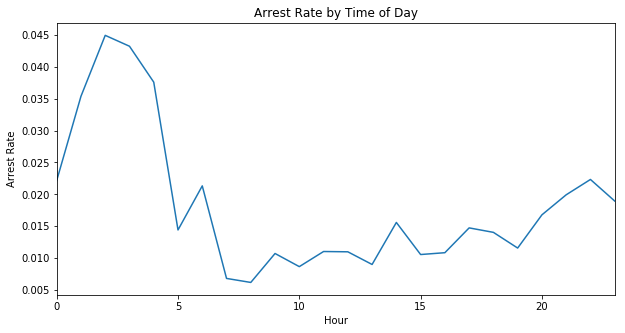

In [95]:
# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

Most of all the traffic stops that occured in Nashville from 2013 to 2016 happened during the night from 0 to 5.

### 3-3 Plotting drug-related stops

In a small portion of traffic stops, drugs are found in the vehicle during a search. In this exercise, you'll assess whether these drug-related stops are becoming more common over time.

The Boolean column `drugs_related_stop` indicates whether drugs were found during a given stop. We'll calculate the annual drug rate by resampling this column, and then you'll use a line plot to visualize how the rate has changed over time.

stop_datetime
2010-12-31    0.043729
2011-12-31    0.044140
2012-12-31    0.040166
2013-12-31    0.043921
2014-12-31    0.038204
2015-12-31    0.037337
2016-12-31    0.034822
Name: contraband_drugs, dtype: float64


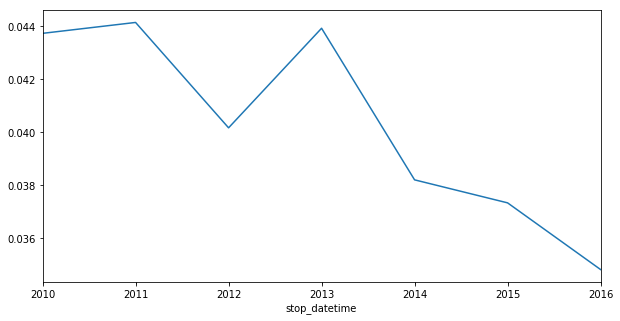

In [96]:

# Calculate the annual rate of drug-related stops
print(nashville.contraband_drugs.resample('A').mean())

# Save the annual rate of drug-related stops
annual_drug_rate = nashville.contraband_drugs.resample('A').mean()

# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()

# Display the plot
plt.show()

There are less and less traffic stops for drug contreband in nashville, as we can see the rate decreasing throughout the years.

### 3-4 Comparing drug and search rates

As we saw in the last graph, the rate of drug-related stops decreased significantly between 2010 and 2016. We might hypothesize that the rate of vehicle searches was also decreasing, which would have led to an decrease in drug-related stops even if more drivers were not carrying drugs.

We can test this hypothesis by calculating the annual search rate, and then plotting it against the annual drug rate. If the hypothesis is true, then we'll see both rates decreasing over time.

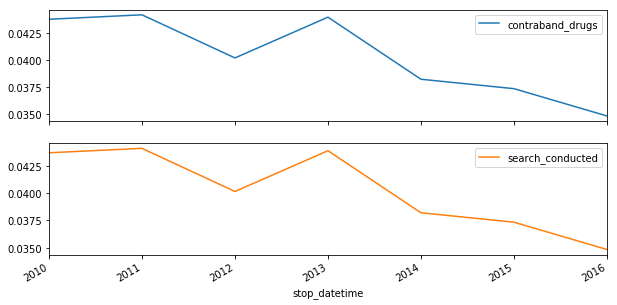

In [99]:
# Calculate and save the annual search rate
annual_search_rate = nashville.search_conducted.resample('A').mean()

# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate,annual_search_rate], axis='columns')

# Create subplots from 'annual'
annual.plot(subplots=True)

# Display the subplots
plt.show()


As we can see both plotes are decreasing meaning that all the search conducted were related to drug contreband.

# 4 - Analyzing ethnicity factor

### 4-1 Count the number of traffic stops for each ethnicity 
Before we can do any operation on our data it is important to do first of all a preview of the data that we are going to use. 

In [100]:
# Count the unique values in 'violation'
print(nashville.subject_race.value_counts())

# Express the counts as proportions
print(nashville.subject_race.value_counts(normalize=True))

white                     54528
black                     37090
hispanic                   5299
asian/pacific islander     1383
unknown                    1292
other                       356
Name: subject_race, dtype: int64
white                     0.545564
black                     0.371093
hispanic                  0.053018
asian/pacific islander    0.013837
unknown                   0.012927
other                     0.003562
Name: subject_race, dtype: float64


We can see in Nashville that half of the people stopped were caucasians during the period that we are analyzing.

### 4-2 Comparing violations type and ethinicity

violation               child restraint  investigative stop  \
subject_race                                                  
asian/pacific islander                1                  20   
black                                24                 821   
hispanic                              1                 147   
other                                 0                   4   
unknown                               0                  24   
white                                17                 867   

violation               moving traffic violation  parking violation  \
subject_race                                                          
asian/pacific islander                       799                  0   
black                                      17404                 98   
hispanic                                    2610                  6   
other                                        182                  1   
unknown                                      726                 32  

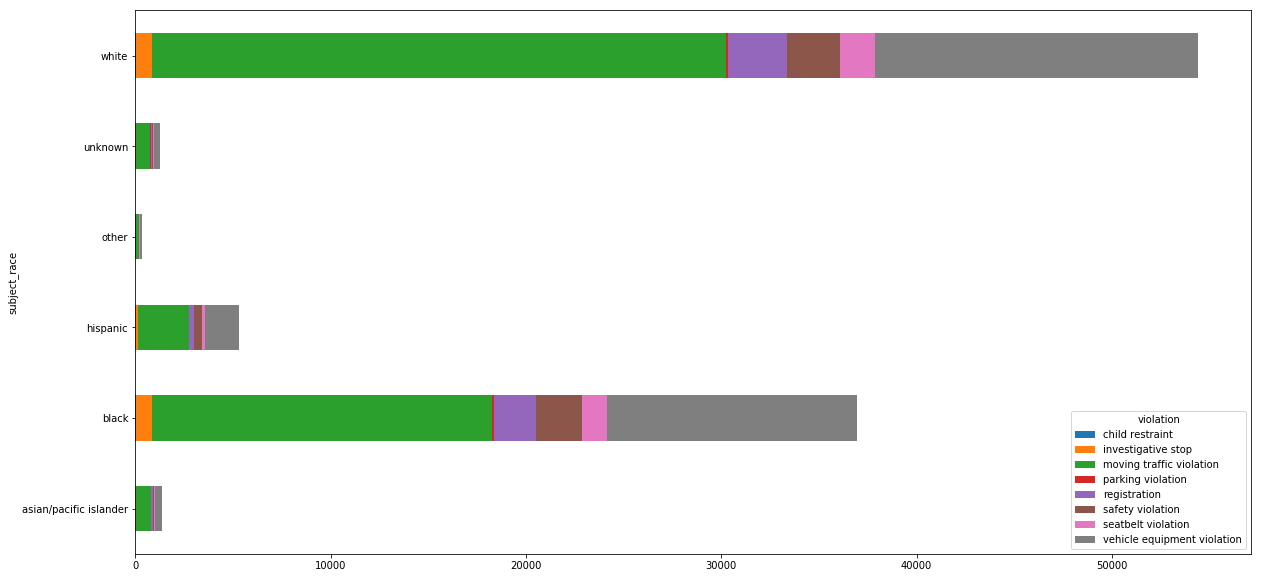

In [109]:
# Create a frequency table of races and violations
print(pd.crosstab(nashville.subject_race,nashville.violation))
plt.rcParams["figure.figsize"] = (20,10)
# Save the table in a variable, then plot the histogram
race_violation = pd.crosstab(nashville.subject_race,nashville.violation)

race_violation.plot(kind='barh', stacked=True)

plt.show()

We can see that 'Moving traffic violation', and 'vehicle equipment violation' is the most common type of violation, and that white and black committed the most of these violations.

### 4-3 Analyze arrests rate between ethinicity

Now that we know which are the violations that each ethinicity commits, we can question ourselves on the traffic stops that resulted in an arrest.

In [153]:
# Create a DataFrame of drivers stopped for speeding
driver_speeding = nashville[nashville.violation =='moving traffic violation']
white = nashville[nashville.subject_race == 'white']
black = nashville[nashville.subject_race == 'black']
hispanic = nashville[nashville.subject_race == 'hispanic']
asian_pacific = nashville[nashville.subject_race == 'asian/pacific islander']
other = nashville[nashville.subject_race == 'other']
unknown = nashville[nashville.subject_race == 'unknown']

print('white :')
print(white.outcome.value_counts(normalize='True'))
print('black :')
print(black.outcome.value_counts(normalize='True'))
print('hispanic :') 
print(hispanic.outcome.value_counts(normalize='True'))
print('asian_pacific :')
print(asian_pacific.outcome.value_counts(normalize='True'))
print('other :')
print(other.outcome.value_counts(normalize='True'))
print('unknown :')
print(unknown.outcome.value_counts(normalize='True'))


white :
warning     0.761272
citation    0.227631
arrest      0.011097
Name: outcome, dtype: float64
black :
warning     0.775142
citation    0.201995
arrest      0.022863
Name: outcome, dtype: float64
hispanic :
warning     0.612002
citation    0.353840
arrest      0.034157
Name: outcome, dtype: float64
asian_pacific :
warning     0.801880
citation    0.193059
arrest      0.005061
Name: outcome, dtype: float64
other :
warning     0.671348
citation    0.308989
arrest      0.019663
Name: outcome, dtype: float64
unknown :
warning     0.710526
citation    0.284056
arrest      0.005418
Name: outcome, dtype: float64


As we can see hispanic and black people have more chance to be arrested after a speeding violation.